# Practica 2: Statistical analysis of the Lipinski's rule of five

## Theory

### **Pharmacokinetics**

Pharmacokinetics are the study of what happens to a compound in an organism over a period of time ([Grogan S, Preuss CV. Pharmacokinetics, 2022](https://www.ncbi.nlm.nih.gov/books/NBK557744/)). It is divide into four steps: **A**bsorption, **D**istribution, **M**etabolism and **E**xcretion ([ADME](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4110820/)). Some times also is includes **T**oxicology (ADMET) and **L**iberation (LADME).


![ADME](Data/ADME.jpg)

*Figure 1*. Steps that make up the pharmacokinetics. From: [Somvanshi, Kharat, Jadhav, Thorat & Townley, 2021](https://doi.org/10.1016/B978-0-323-85050-6.00007-4)

   * **Absorption:** It refers to the amount and time it takes for a compound or substance to enter to the systemic circulationt from the site of administration. This depends on multiple factors such as the ability of the compound to penetrate the intestinal wall, the solubility of the compound, the gastric emptying time, the chemical stability of the compound in the stomach, among others.
   * **Distribution:** It refers to how a substance is spread throughout the body. This depends on the diffusion and convection which may be influenced by the polarity, size, or binding abilities of the drug, the fluid status of the patient, or the body habitus of the individual. It is very important to achieve the effective drug concentration in the receptor site because to be effective a medication must reach its designated compartmental destination.
   * **Metabolism:** It refers to the processing of the drug by the body into subsequent compounds. It can be also to convert a drug  into more water-soluble substances in order to be more easily to excreted or in the case of prodrugs the metabolism is required to convert the drug into active metabolites.
   * **Excretion:** It refers to the process by which the drug is eliminated from the body. Generally the kidneys are the conduct of excretion by a passive filtration in the glomerulus or secretion in the tubules.

### **Lipinski's rule of five:**

The Lipinski's rule of five is one way to screen out compounds with probable absorption problems. This rule states that poor absorption or permeation of a drug is more probable when the chemical structure fulfils two or more of the [following criteria:](https://www.sciencedirect.com/science/article/pii/B008045044X001474)
1. Molecular weight (MW) is greater than 500.
2. The calculated log P value is above 5.
3. There are more than 5 hydrogen bond donors (–NH–, –OH).
4. The number of hydrogen bond acceptors (–N ¼ , –O–) is greater than 10.

It is importat to know that the rule of five e does not definitively categorize all well and poorly absorbed compounds, although it is simple, fast, and provides a reasonable degree of classification.

# Carga de datos
Lo primero que vamos a hacer es importar la base de datos trabajada en la primera práctica, como está guardada en una carpeta diferente, lo primero que tenemos que hacer es crear un `directorio raíz` (`ROOT_DIR`) para poder navegar hasta el archivo

In [20]:
# Librerias necesarias para importar la base de datos guardada
import pandas as pd
import os
from pathlib import Path

current_directory = os.getcwd()
ROOT_DIR = Path(current_directory).parent
uniprot_id = 'P00533'
# uniprot_id = 'P49841'
print('Directorio raíz:', ROOT_DIR)
df_output = pd.read_csv(f'{ROOT_DIR}/01_Sesion-I/data/compounds_{uniprot_id}_full.csv')
df_output.head()

Directorio raíz: C:\Users\caramirezs\My Drive\Python\Farmacoinformatica-2022


,molecule_chembl_id,pIC50,smile,ROMol
0,CHEMBL29197,10.60,COc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OC,<rdkit.Chem.rdchem.Mol object at 0x00000255BB1...
1,CHEMBL417478,9.80,C=CC(=O)Nc1nc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1/C=C/...,<rdkit.Chem.rdchem.Mol object at 0x00000255AC9...
2,CHEMBL31815,9.38,C=CC(=O)Nc1ccc2ncnc(Nc3cccc(C)c3)c2c1,<rdkit.Chem.rdchem.Mol object at 0x00000255AC9...
3,CHEMBL28418,9.12,C=CC(=O)Nc1ccc2ncnc(Nc3ccc(F)c(Cl)c3)c2n1,<rdkit.Chem.rdchem.Mol object at 0x00000255AC9...
4,CHEMBL31373,9.12,C=CC(=O)Nc1ccc2ncnc(Nc3ccc(F)c(Cl)c3)c2c1,<rdkit.Chem.rdchem.Mol object at 0x00000255AC9...


# Propiedades de Lipinski

La siguiente función nos permite calcular las cuatro propiedades químicas de Lipinski de una base de datos que tenga una columna con los smiles.
Luego se definen las condiciones para que la molécula cumpla o no la regla de los cinco y se crea una columna que indica si la molecula cumple o no la regla.

In [21]:
# Librerias necessarias para adquirir las propiedades químicas de una molécula
from rdkit import Chem
from rdkit.Chem import Descriptors

def Ro5(df):
    smi = df['smile']
    m = Chem.MolFromSmiles(smi)

    # Calculate rule of five chemical properties
    MW = Descriptors.ExactMolWt(m)
    HBA = Descriptors.NumHAcceptors(m)
    HBD = Descriptors.NumHDonors(m)
    LogP = Descriptors.MolLogP(m)

    # Rule of five conditions
    conditions = [MW <= 500, HBA <= 10, HBD <= 5, LogP <= 5]

    # Create pandas row for conditions results with values and information whether rule of five is violated
    return pd.Series([MW, HBA, HBD, LogP, 'yes']) if conditions.count(True) >= 3 else pd.Series(
        [MW, HBA, HBD, LogP, 'no'])

Ahora se aplica la función `df_rule_5` a cada molécula, esto crea un nuevo dataset con la información

In [22]:
df_rule5 = df_output.apply(Ro5, axis=1)
# Nombre de las columnas condition columns
df_rule5.columns= ['MW', 'HBA', 'HBD', 'LogP', 'rule_of_five_conform']
df_rule5.head()

,MW,HBA,HBD,LogP,rule_of_five_conform
0,359.026939,5,1,4.15310,yes
1,482.163330,7,2,4.42090,yes
2,304.132411,4,2,3.80632,yes
3,343.063616,5,2,3.68540,yes
4,342.068367,4,2,4.29040,yes


Finalmente se concatena el dataset construido (`rule5_df`) con el original (`df_output`)

In [23]:
df_molecule = df_output.join(df_rule5)
df_molecule.head()

,molecule_chembl_id,pIC50,smile,ROMol,MW,HBA,HBD,LogP,rule_of_five_conform
0,CHEMBL29197,10.60,COc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OC,<rdkit.Chem.rdchem.Mol object at 0x00000255BB1...,359.026939,5,1,4.15310,yes
1,CHEMBL417478,9.80,C=CC(=O)Nc1nc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1/C=C/...,<rdkit.Chem.rdchem.Mol object at 0x00000255AC9...,482.163330,7,2,4.42090,yes
2,CHEMBL31815,9.38,C=CC(=O)Nc1ccc2ncnc(Nc3cccc(C)c3)c2c1,<rdkit.Chem.rdchem.Mol object at 0x00000255AC9...,304.132411,4,2,3.80632,yes
3,CHEMBL28418,9.12,C=CC(=O)Nc1ccc2ncnc(Nc3ccc(F)c(Cl)c3)c2n1,<rdkit.Chem.rdchem.Mol object at 0x00000255AC9...,343.063616,5,2,3.68540,yes
4,CHEMBL31373,9.12,C=CC(=O)Nc1ccc2ncnc(Nc3ccc(F)c(Cl)c3)c2c1,<rdkit.Chem.rdchem.Mol object at 0x00000255AC9...,342.068367,4,2,4.29040,yes


Finalmente, guardamos los datos

In [24]:
df_molecule.to_csv(f'data/{uniprot_id}_compounds_lipinski.csv')

# Análisis de la información
Primero, veamos la distribución de la regla de los cinco (cuántas moléculas cumplen o no la regla)

Regla de los cinco. Compuesto: P00533. Total moléculas: 99
yes    89
no     10
Name: rule_of_five_conform, dtype: int64


<AxesSubplot: >

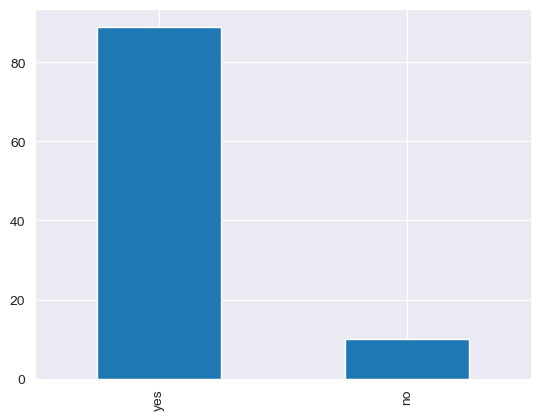

In [25]:
print(f'Regla de los cinco. Compuesto: {uniprot_id}. Total moléculas: {len(df_molecule)}')
print(df_molecule.rule_of_five_conform.value_counts())
df_molecule.rule_of_five_conform.value_counts().plot.bar()

## Múltiples distribuciones
Podemos crear una gráfica con múltiples distribuciones bivariadas por pares del conjunto de datos con las propiedades químicas adquiridas. Finalmente, podemos guardar la imagen.

<Figure size 2000x2000 with 0 Axes>

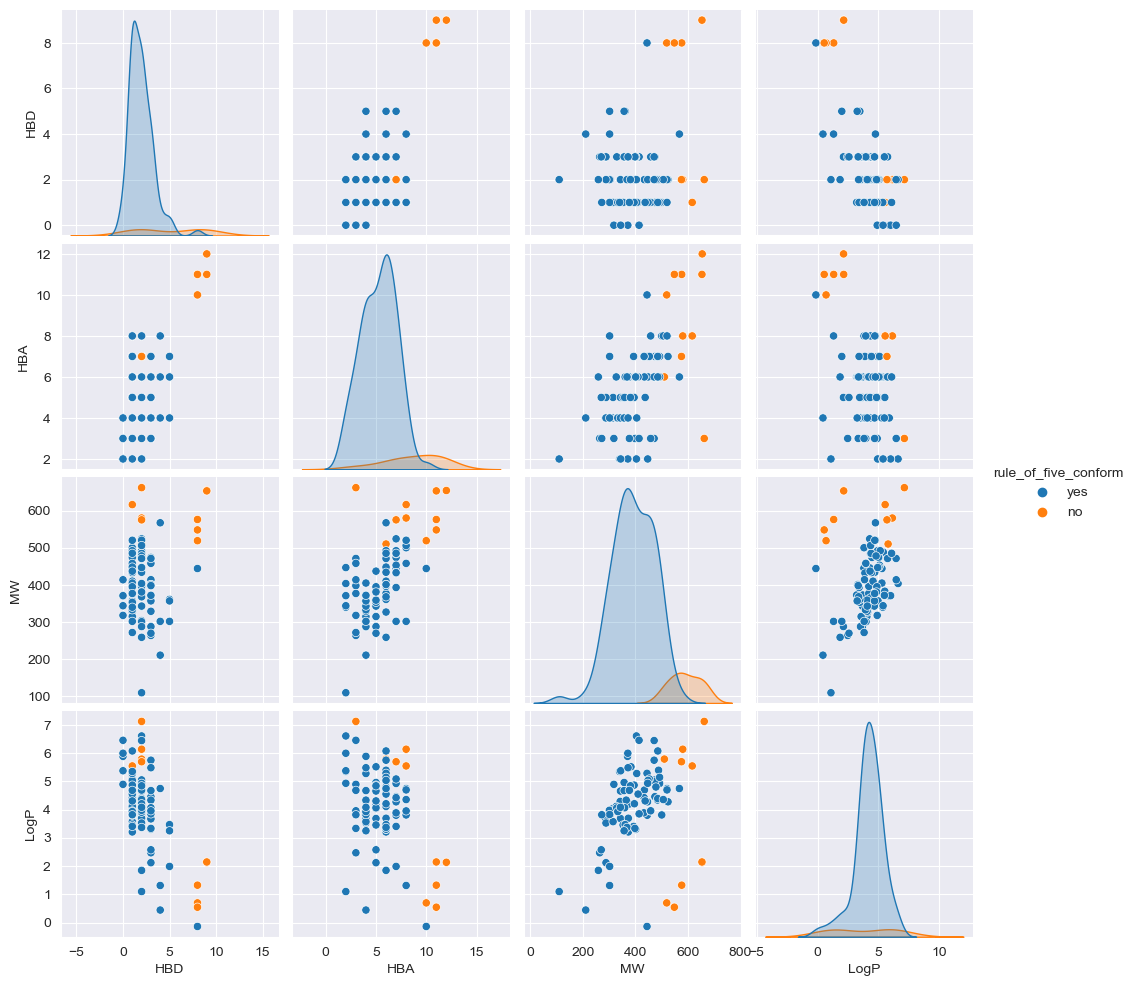

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(20, 20))
ax = sns.pairplot(data=df_molecule, vars=['HBD', 'HBA', 'MW', 'LogP'], hue='rule_of_five_conform')
plt.savefig(f'data/pairplot_Ro5_{uniprot_id}.png', bbox_inches='tight')
plt.show()
plt.close()

## Estadísticas

In [27]:
df_molecule[['MW', 'HBA', 'HBD', 'LogP', 'rule_of_five_conform']].groupby(["rule_of_five_conform"]).agg(["mean", "std"])

MW                  HBA                 HBD  \
                            mean        std      mean       std      mean   
rule_of_five_conform                                                        
no                    589.438385  55.381859  8.700000  2.830391  5.100000   
yes                   391.592361  79.557641  5.247191  1.727326  1.921348   

                                    LogP            
                           std      mean       std  
rule_of_five_conform                                
no                    3.510302  3.713782  2.559181  
yes                   1.281199  4.169363  1.206160

# Radar Plot

Podemos utilizar un Radar plot para comparar la información de las cuatro propiedades químicas de Lipinsky.

## Escalar los datos
Debido a que cada propiedad tiene una escala diferente, primero debemos escalar los datos, hay varias maneras de hacerlo, nosotros vamos a utilizar el método `MinMaxScaler` y se van a escalar los valores sobre el intervalo $[0, 10]$.
Inicialmente, se escala todo el conjunto de datos (los valores escalados se agregan en las últimas columnas):

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,10))
scaler.fit(df_molecule[['MW', 'HBA', 'HBD', 'LogP']])
df_molecule_scaled = scaler.transform(df_molecule[['MW', 'HBA', 'HBD', 'LogP']])
df_molecule_scaled = df_molecule.join(pd.DataFrame(df_molecule_scaled, columns=['MW_scaled', 'HBA_scaled', 'HBD_scaled', 'LogP_scaled']))
df_molecule_scaled

,molecule_chembl_id,pIC50,smile,ROMol,MW,HBA,HBD,LogP,rule_of_five_conform,MW_scaled,HBA_scaled,HBD_scaled,LogP_scaled
0,CHEMBL29197,10.60,COc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OC,<rdkit.Chem.rdchem.Mol object at 0x00000255BB1...,359.026939,5,1,4.15310,yes,4.512200,3.0,1.111111,5.909329
1,CHEMBL417478,9.80,C=CC(=O)Nc1nc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1/C=C/...,<rdkit.Chem.rdchem.Mol object at 0x00000255AC9...,482.163330,7,2,4.42090,yes,6.743678,5.0,2.222222,6.278016
2,CHEMBL31815,9.38,C=CC(=O)Nc1ccc2ncnc(Nc3cccc(C)c3)c2c1,<rdkit.Chem.rdchem.Mol object at 0x00000255AC9...,304.132411,4,2,3.80632,yes,3.517402,2.0,2.222222,5.431907
3,CHEMBL28418,9.12,C=CC(=O)Nc1ccc2ncnc(Nc3ccc(F)c(Cl)c3)c2n1,<rdkit.Chem.rdchem.Mol object at 0x00000255AC9...,343.063616,5,2,3.68540,yes,4.222913,3.0,2.222222,5.265433
4,CHEMBL31373,9.12,C=CC(=O)Nc1ccc2ncnc(Nc3ccc(F)c(Cl)c3)c2c1,<rdkit.Chem.rdchem.Mol object at 0x00000255AC9...,342.068367,4,2,4.29040,yes,4.204877,2.0,2.222222,6.098353
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,CHEMBL21108,4.05,O=C1NC(=O)c2c1c1c3cccc(O)c3[nH]c1c1c2c2cccc(O)...,<rdkit.Chem.rdchem.Mol object at 0x00000255C00...,519.127779,10,8,0.69620,no,7.413548,8.0,8.888889,1.150118
95,CHEMBL19978,4.02,O=C(Nc1ccccc1)NN1C(=O)c2c(c3c4cccc(O)c4n(C4OC(...,<rdkit.Chem.rdchem.Mol object at 0x00000255C00...,653.175792,11,9,2.14530,no,9.842766,9.0,10.000000,3.145135
96,CHEMBL10,4.02,C[S+]([O-])c1ccc(-c2nc(-c3ccc(F)cc3)c(-c3ccncc...,<rdkit.Chem.rdchem.Mol object at 0x00000255C00...,377.099811,3,1,4.68220,yes,4.839717,1.0,1.111111,6.637755
97,CHEMBL277667,4.00,CNN1C(=O)c2c(c3c4cccc(O)c4n(C4OC(CO)C(O)C(O)C4...,<rdkit.Chem.rdchem.Mol object at 0x00000255C00...,548.154328,11,8,0.54300,no,7.939567,9.0,8.888889,0.939204


El radar plot se va a hacer con la media y la desviación estándar de cada propiedad, estas medidas se pueden hallar fácilmente

In [29]:
metrics_Ro5_stats_scaled = df_molecule_scaled[['MW_scaled', 'HBA_scaled', 'HBD_scaled', 'LogP_scaled']].agg(["mean", "std"])
metrics_Ro5_stats_scaled

,MW_scaled,HBA_scaled,HBD_scaled,LogP_scaled
mean,5.464509,3.595960,2.491582,5.868364
std,1.771510,2.123336,2.088318,1.911068


Ahora vamos a crear la función que realiza la gráfica. Como entrada se debe dar dos listas: una lista con la media de cada propiedad y otra con la desviación estándar.

In [30]:
def plot_radar(stats_mean, stats_std):
    from math import pi
    import numpy as np
    # ------- PART 1: Create background
    # number of variable
    N = 4

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the radar plot
    fig = plt.figure(figsize=(10, 10))
    ax = plt.subplot(111, polar=True)

    # If you want the first axis to be on top:
    # ax.set_theta_offset(pi / 2)
    # ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels
    categories = ['MW (scaled)', 'HBA (scaled)', 'HBD (scaled)', 'LogP (scaled)']
    plt.xticks(angles[:-1], categories, size=14)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([2, 4, 6, 8], ["2", "4", "6", "8"],
               color="grey", size=12)
    # plt.ylim(0,10)

    # ------- PART 2: Add plots
    # Plot each individual = each line of the data
    # data
    data = stats_mean.values
    data = np.append(data, data[0])  # close polygon
    ax.plot(angles, data, linewidth=3, linestyle='solid', color='purple', label="mean")
    # data + std
    data_std_up = stats_mean.values + stats_std.values
    data_std_up = np.append(data_std_up, data_std_up[0])  # close polygon
    ax.plot(angles, data_std_up, linewidth=2, linestyle='dashed', color='limegreen', label="mean + std")
    # data - std
    data_std_down = stats_mean.values - stats_std.values
    data_std_down = np.append(data_std_down, data_std_down[0])  # close polygon
    ax.plot(angles, data_std_down, linewidth=2, linestyle='dashed', color='limegreen', label="mean - std")

    # rule of five area
    ro5_properties = {"MW": 500, "HBA": 10, "HBD": 5, "LogP": 5}
    ro5_properties_scaled = scaler.transform(pd.DataFrame([ro5_properties]))[0]
    ro5_properties_scaled = np.append(ro5_properties_scaled, ro5_properties_scaled[0])

    ax.fill(angles, ro5_properties_scaled, 'thistle', alpha=0.6, label="rule of five area")

    # Add legend
    plt.legend(loc='upper right')
    plt.ylim(0,max(max(data_std_up), max(ro5_properties_scaled)))

    # Show the graph
    plt.show()

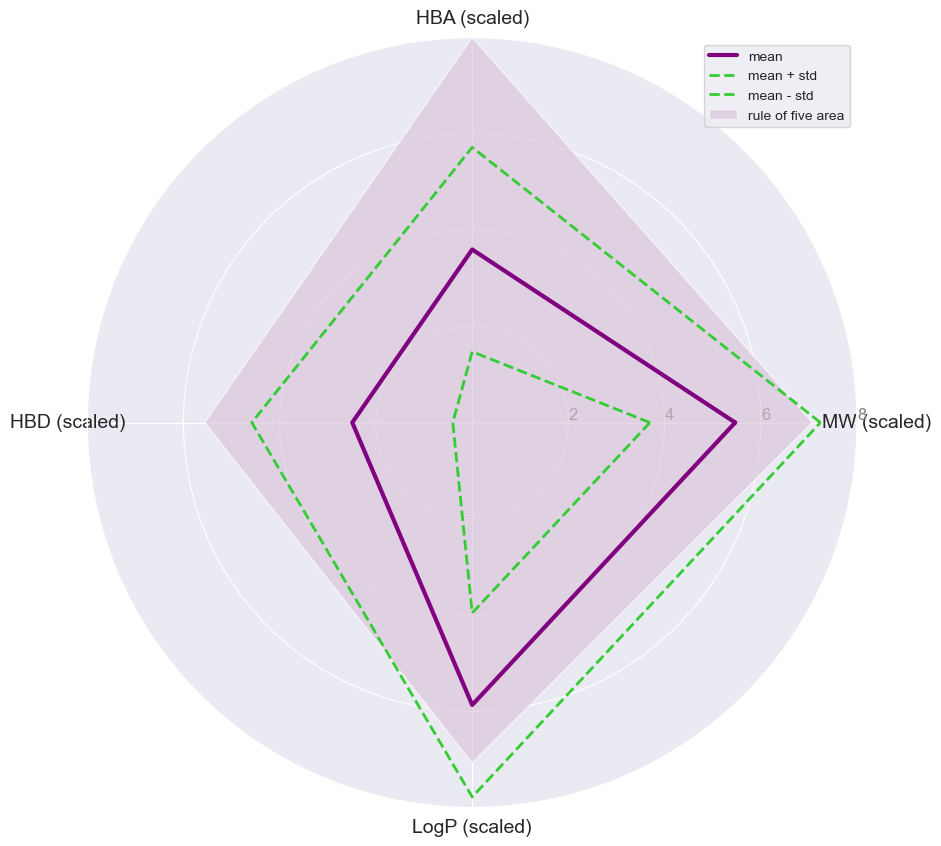

In [31]:
plot_radar(metrics_Ro5_stats_scaled.loc['mean'], metrics_Ro5_stats_scaled.loc['std'])

## Radar plot - Rof comfort: YES
Ahora vamos a repetir el proceso, pero solamente con las moléculas que pasaron el test de la regla de los cinco.
Primero debemos filtrar el conjunto `rule_of_five_conform: yes`


In [32]:
df_molecule_Ro5_yes = df_molecule[df_molecule['rule_of_five_conform']=='yes']

Y luego repetimos el proceso anterior pero con los datos filtrados:

In [33]:
scaler = MinMaxScaler(feature_range=(0,10))
scaler.fit(df_molecule_Ro5_yes[['MW', 'HBA', 'HBD', 'LogP']])
df_molecule_Ro5_yes_scaled = scaler.transform(df_molecule_Ro5_yes[['MW', 'HBA', 'HBD', 'LogP']])
df_molecule_Ro5_yes_scaled = df_molecule.join(pd.DataFrame(df_molecule_Ro5_yes_scaled, columns=['MW_scaled', 'HBA_scaled', 'HBD_scaled', 'LogP_scaled']))
df_molecule_Ro5_yes_scaled.head()

,molecule_chembl_id,pIC50,smile,ROMol,MW,HBA,HBD,LogP,rule_of_five_conform,MW_scaled,HBA_scaled,HBD_scaled,LogP_scaled
0,CHEMBL29197,10.60,COc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OC,<rdkit.Chem.rdchem.Mol object at 0x00000255BB1...,359.026939,5,1,4.15310,yes,5.445070,3.75,1.25,6.360659
1,CHEMBL417478,9.80,C=CC(=O)Nc1nc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1/C=C/...,<rdkit.Chem.rdchem.Mol object at 0x00000255AC9...,482.163330,7,2,4.42090,yes,8.137893,6.25,2.50,6.757506
2,CHEMBL31815,9.38,C=CC(=O)Nc1ccc2ncnc(Nc3cccc(C)c3)c2c1,<rdkit.Chem.rdchem.Mol object at 0x00000255AC9...,304.132411,4,2,3.80632,yes,4.244603,2.50,2.50,5.846774
3,CHEMBL28418,9.12,C=CC(=O)Nc1ccc2ncnc(Nc3ccc(F)c(Cl)c3)c2n1,<rdkit.Chem.rdchem.Mol object at 0x00000255AC9...,343.063616,5,2,3.68540,yes,5.095975,3.75,2.50,5.667585
4,CHEMBL31373,9.12,C=CC(=O)Nc1ccc2ncnc(Nc3ccc(F)c(Cl)c3)c2c1,<rdkit.Chem.rdchem.Mol object at 0x00000255AC9...,342.068367,4,2,4.29040,yes,5.074210,2.50,2.50,6.564121


In [34]:
metrics_df_molecule_Ro5_yes_scaled = df_molecule_Ro5_yes_scaled[['MW_scaled', 'HBA_scaled', 'HBD_scaled', 'LogP_scaled']].agg(["mean", "std"])
metrics_df_molecule_Ro5_yes_scaled

,MW_scaled,HBA_scaled,HBD_scaled,LogP_scaled
mean,6.157231,4.058989,2.401685,6.384759
std,1.739816,2.159158,1.601499,1.787380


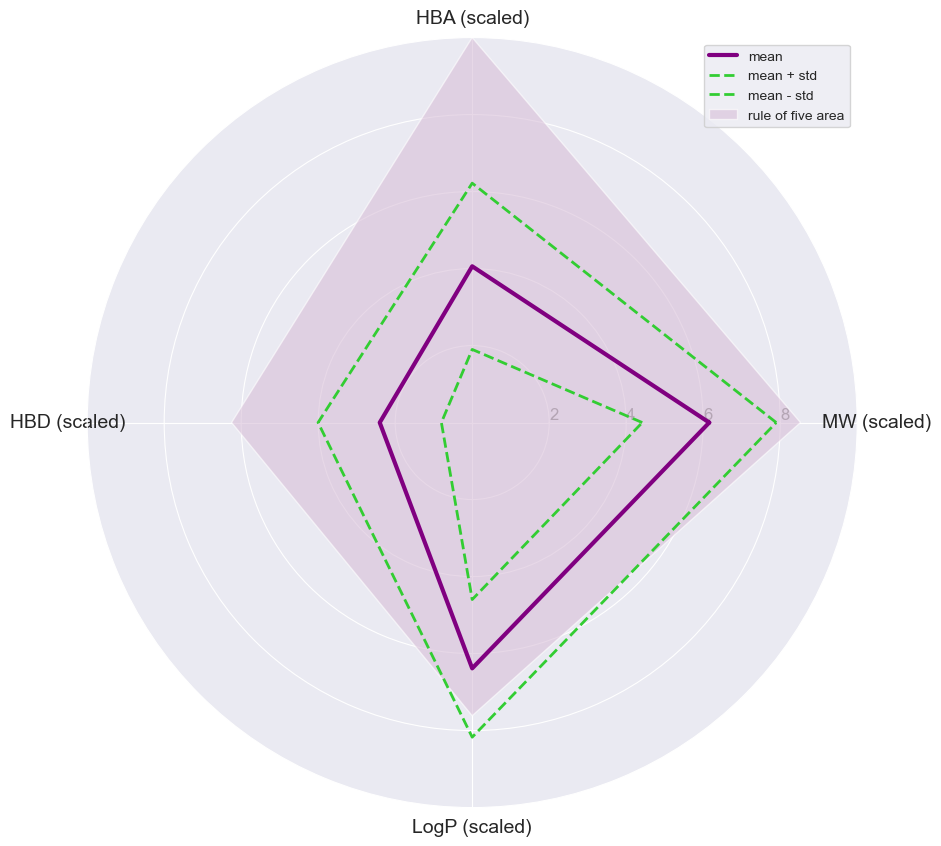

In [35]:
plot_radar(metrics_df_molecule_Ro5_yes_scaled.loc['mean'], metrics_df_molecule_Ro5_yes_scaled.loc['std'])

## Radar plot - Rof comfort: NO
Ahora vamos a repetir el proceso, pero solamente con las moléculas que pasaron el test de la regla de los cinco.
Primero debemos filtrar el conjunto `rule_of_five_conform: no`


In [36]:
df_molecule_Ro5_no = df_molecule[df_molecule['rule_of_five_conform']=='no']
scaler = MinMaxScaler(feature_range=(0,10))
scaler.fit(df_molecule_Ro5_yes[['MW', 'HBA', 'HBD', 'LogP']])
df_molecule_Ro5_no_scaled = scaler.transform(df_molecule_Ro5_no[['MW', 'HBA', 'HBD', 'LogP']])
df_molecule_Ro5_no_scaled = df_molecule.join(pd.DataFrame(df_molecule_Ro5_no_scaled, columns=['MW_scaled', 'HBA_scaled', 'HBD_scaled', 'LogP_scaled']))
df_molecule_Ro5_no_scaled.head()

,molecule_chembl_id,pIC50,smile,ROMol,MW,HBA,HBD,LogP,rule_of_five_conform,MW_scaled,HBA_scaled,HBD_scaled,LogP_scaled
0,CHEMBL29197,10.60,COc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OC,<rdkit.Chem.rdchem.Mol object at 0x00000255BB1...,359.026939,5,1,4.15310,yes,10.280392,7.50,2.50,9.303666
1,CHEMBL417478,9.80,C=CC(=O)Nc1nc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1/C=C/...,<rdkit.Chem.rdchem.Mol object at 0x00000255AC9...,482.163330,7,2,4.42090,yes,8.750751,5.00,2.50,8.786195
2,CHEMBL31815,9.38,C=CC(=O)Nc1ccc2ncnc(Nc3cccc(C)c3)c2c1,<rdkit.Chem.rdchem.Mol object at 0x00000255AC9...,304.132411,4,2,3.80632,yes,11.069018,7.50,1.25,8.426099
3,CHEMBL28418,9.12,C=CC(=O)Nc1ccc2ncnc(Nc3ccc(F)c(Cl)c3)c2n1,<rdkit.Chem.rdchem.Mol object at 0x00000255AC9...,343.063616,5,2,3.68540,yes,12.067439,1.25,2.50,10.763759
4,CHEMBL31373,9.12,C=CC(=O)Nc1ccc2ncnc(Nc3ccc(F)c(Cl)c3)c2c1,<rdkit.Chem.rdchem.Mol object at 0x00000255AC9...,342.068367,4,2,4.29040,yes,10.172673,6.25,2.50,8.646928


In [37]:
metrics_df_molecule_Ro5_no_scaled = df_molecule_Ro5_no_scaled[['MW_scaled', 'HBA_scaled', 'HBD_scaled', 'LogP_scaled']].agg(["mean", "std"])
metrics_df_molecule_Ro5_yes_scaled

,MW_scaled,HBA_scaled,HBD_scaled,LogP_scaled
mean,6.157231,4.058989,2.401685,6.384759
std,1.739816,2.159158,1.601499,1.787380


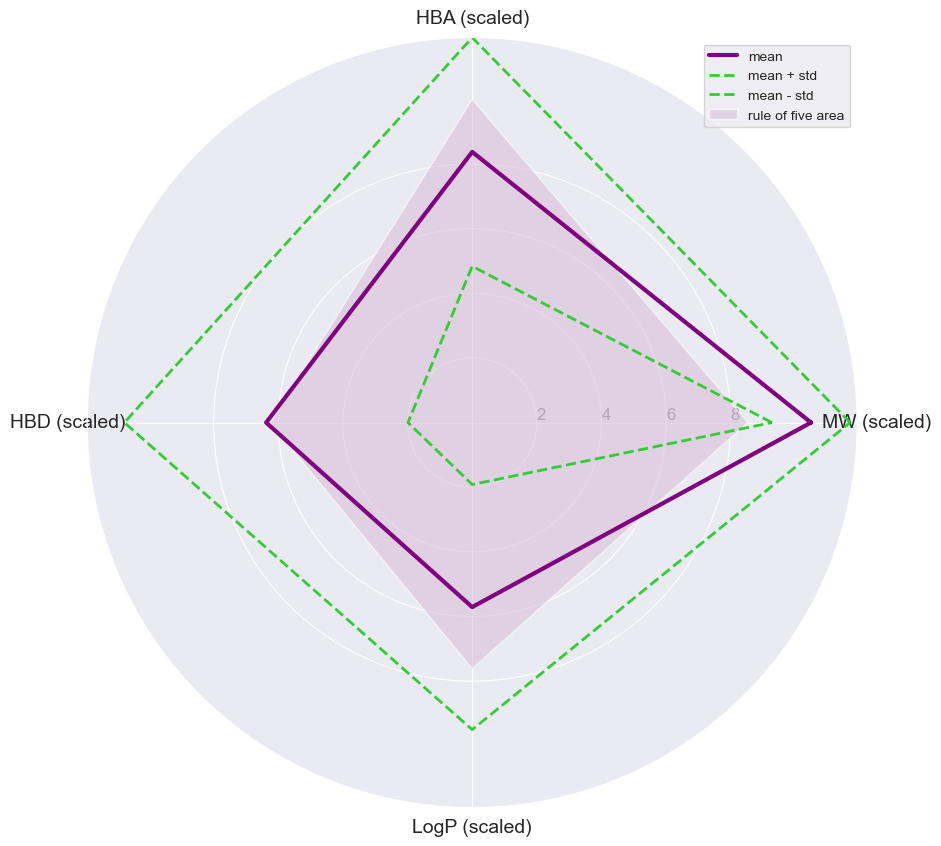

In [38]:
plot_radar(metrics_df_molecule_Ro5_no_scaled.loc['mean'], metrics_df_molecule_Ro5_no_scaled.loc['std'])